In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, BaggingClassifier 
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier 
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import r2_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.compose import ColumnTransformer

In [2]:
# Fonction d'évaluation étendue
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    # Calcul des métriques
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    
    # Convertir les prédictions en classes binaires pour le score F1
    y_pred_binary = (y_pred > 0.5).astype(int)
    y_test_binary = (y_test > 0.5).astype(int)
    f1 = f1_score(y_test_binary, y_pred_binary)

    # Affichage des métriques
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R2 Score: {r2}")
    print(f"F1 Score: {f1}")

In [ ]:
# Charger les données
df1 = pd.read_csv("datasets/data_cleaned.csv")
# Remplacer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
df1['price'] = imputer.fit_transform(df1[['price']])

# Séparer les caractéristiques et la cible
X = df1.drop('price', axis=1)
y = df1['price']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ratio_missing_values = df1.isna().sum() / df.count()

# Affichage du résultat
print(ratio_missing_values)

# Supprimer les colonnes 'Unnamed: 0' et 'points'
X_train = X_train.drop(columns=['Unnamed: 0', 'points'])
X_test = X_test.drop(columns=['Unnamed: 0', 'points'])

# Sélection automatique des colonnes numériques et catégorielles après suppression
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Configuration du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),
        ('categorical', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')), categorical_features)
    ]
)

# Modèle de base pour Bagging
base_model = DecisionTreeRegressor(max_depth=10)

# Modèle Bagging avec le modèle de base
bagging_model = make_pipeline(preprocessor, BaggingRegressor(base_model, n_estimators=100, max_features=0.8))

# Entraînement du modèle
bagging_model.fit(X_train, y_train)

# Évaluation du modèle
evaluate_model(bagging_model, X_test, y_test)

# Obtenir les prédictions du modèle
y_pred = bagging_model.predict(X_test)

# Créer un graphique
plt.figure(figsize=(12, 6))

# Tracer les valeurs réelles
plt.scatter(range(len(y_test)), y_test, color='blue', label='Réel', alpha=0.5)

# Tracer les valeurs prédites
plt.scatter(range(len(y_test)), y_pred, color='red', label='Prédiction', alpha=0.5)

# Ajouter des labels et une légende
plt.xlabel('Échantillons')
plt.ylabel('Prix')
plt.legend()

# Afficher le graphique
plt.show()

Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.405001
points                   0.000000
price                    0.000000
province                 0.000485
region_1                 0.195421
region_2                 1.573123
taster_name              0.253010
taster_twitter_handle    0.316055
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64
Mean Squared Error: 1404.1571514468462
Root Mean Squared Error: 37.4720849626338
R2 Score: 0.15251086680831316
F1 Score: 1.0


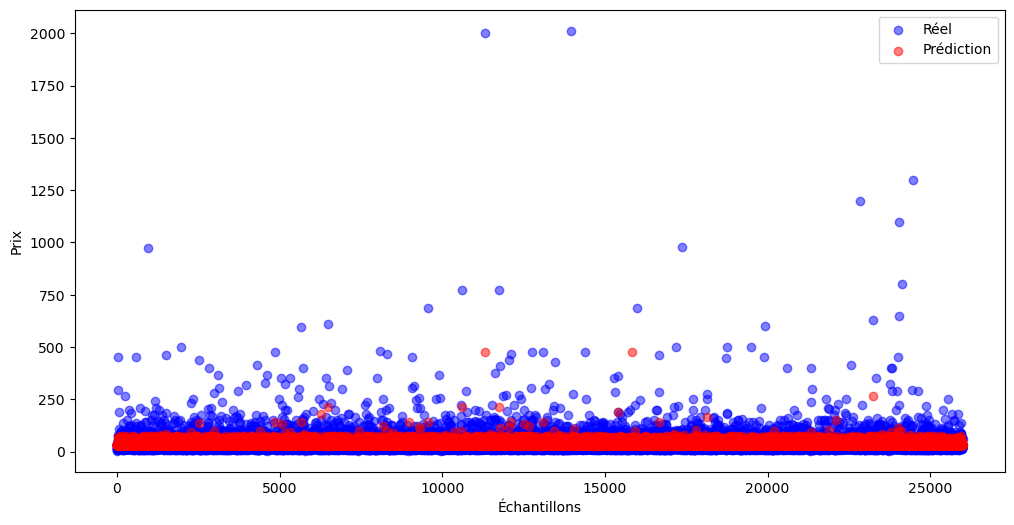

In [3]:
# Charger les données
df = pd.read_csv("datasets/wine.csv")
# Remplacer les valeurs manquantes
imputer = SimpleImputer(strategy='mean')
df['price'] = imputer.fit_transform(df[['price']])

# Séparer les caractéristiques et la cible
X = df.drop('price', axis=1)
y = df['price']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ratio_missing_values = df.isna().sum() / df.count()

# Affichage du résultat
print(ratio_missing_values)

# Supprimer les colonnes 'Unnamed: 0' et 'points'
X_train = X_train.drop(columns=['Unnamed: 0', 'points'])
X_test = X_test.drop(columns=['Unnamed: 0', 'points'])

# Sélection automatique des colonnes numériques et catégorielles après suppression
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Configuration du préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', StandardScaler(), numeric_features),
        ('categorical', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(handle_unknown='ignore')), categorical_features)
    ]
)

# Modèle de base pour Bagging
base_model = DecisionTreeRegressor(max_depth=10)

# Modèle Bagging avec le modèle de base
bagging_model = make_pipeline(preprocessor, BaggingRegressor(base_model, n_estimators=100, max_features=0.8))

# Entraînement du modèle
bagging_model.fit(X_train, y_train)

# Évaluation du modèle
evaluate_model(bagging_model, X_test, y_test)

# Obtenir les prédictions du modèle
y_pred = bagging_model.predict(X_test)

# Créer un graphique
plt.figure(figsize=(12, 6))

# Tracer les valeurs réelles
plt.scatter(range(len(y_test)), y_test, color='blue', label='Réel', alpha=0.5)

# Tracer les valeurs prédites
plt.scatter(range(len(y_test)), y_pred, color='red', label='Prédiction', alpha=0.5)

# Ajouter des labels et une légende
plt.xlabel('Échantillons')
plt.ylabel('Prix')
plt.legend()

# Afficher le graphique
plt.show()

Exercice sur le Bagging et le Pasting :

Contexte : Vous travaillez avec un ensemble de données sur le vin provenant du fichier wine.csv. L'objectif est de prédire le prix du vin en utilisant des modèles de Bagging et de Pasting avec des arbres de décision comme modèles de base.

    Chargement des données :
        Chargez le jeu de données depuis le fichier wine.csv.
        Supprimez les lignes avec des valeurs manquantes dans la colonne price.

    Préparation des données :
        Séparez les variables indépendantes (X) et la variable cible (y).
        Divisez l'ensemble de données en ensembles d'entraînement et de test.

    Bagging avec Arbres de Décision :
        Utilisez un modèle de Bagging avec un arbre de décision comme modèle de base.
        Utilisez le critère de Gini pour mesurer la pureté des nœuds dans les arbres.
        Ajustez le modèle sur l'ensemble d'entraînement en utilisant 50 estimateurs.
        Évaluez la performance sur l'ensemble de test en utilisant les métriques suivantes :
            Score F1
            Score R2
        Affichez les résultats et comparez-les avec les modèles individuels.

    Pasting avec Arbres de Décision :
        Utilisez un modèle de Pasting avec un arbre de décision comme modèle de base.
        Utilisez le critère d'entropie pour mesurer la pureté des nœuds dans les arbres.
        Ajustez le modèle sur l'ensemble d'entraînement en utilisant 50 estimateurs.
        Évaluez la performance sur l'ensemble de test en utilisant les métriques suivantes :
            Score F1
            Score R2
        Affichez les résultats et comparez-les avec les modèles individuels.

    Questions de Discussion :
        Comparez les résultats obtenus avec le Bagging et le Pasting. Quelles observations pouvez-vous faire sur la performance des deux méthodes ?
        Expliquez comment l'utilisation de l'échantillonnage avec remplacement (Bagging) peut influencer la performance par rapport à l'utilisation de l'échantillonnage sans remplacement (Pasting).
        Comment les métriques F1 et R2 sont-elles utilisées pour évaluer la performance d'un modèle de régression ? Quelles informations fournissent-elles ?

N'oubliez pas d'utiliser les hyperparamètres vus précédemment (nombre d'estimateurs, critère de mesure de la pureté, etc.) pour ajuster vos modèles. Bon exercice !

Chargement des données :
        Chargez le jeu de données depuis le fichier wine.csv.
        Supprimez les lignes avec des valeurs manquantes dans la colonne price.

Préparation des données :
        Séparez les variables indépendantes (X) et la variable cible (y).
        Divisez l'ensemble de données en ensembles d'entraînement et de test.

Bagging avec Arbres de Décision :
        Utilisez un modèle de Bagging avec un arbre de décision comme modèle de base.
        Utilisez le critère de Gini pour mesurer la pureté des nœuds dans les arbres.
        Ajustez le modèle sur l'ensemble d'entraînement en utilisant 50 estimateurs.
        Évaluez la performance sur l'ensemble de test en utilisant les métriques suivantes :
            Score F1
            Score R2
        Affichez les résultats et comparez-les avec les modèles individuels.

Pasting avec Arbres de Décision :
        Utilisez un modèle de Pasting avec un arbre de décision comme modèle de base.
        Utilisez le critère d'entropie pour mesurer la pureté des nœuds dans les arbres.
        Ajustez le modèle sur l'ensemble d'entraînement en utilisant 50 estimateurs.
        Évaluez la performance sur l'ensemble de test en utilisant les métriques suivantes :
            Score F1
            Score R2
        Affichez les résultats et comparez-les avec les modèles individuels.

Questions de Discussion :
        Comparez les résultats obtenus avec le Bagging et le Pasting. Quelles observations pouvez-vous faire sur la performance des deux méthodes ?
        Expliquez comment l'utilisation de l'échantillonnage avec remplacement (Bagging) peut influencer la performance par rapport à l'utilisation de l'échantillonnage sans remplacement (Pasting).
        Comment les métriques F1 et R2 sont-elles utilisées pour évaluer la performance d'un modèle de régression ? Quelles informations fournissent-elles ?

N'oubliez pas d'utiliser les hyperparamètres vus précédemment (nombre d'estimateurs, critère de mesure de la pureté, etc.) pour ajuster vos modèles. Bon exercice !

QCM sur le Bagging, le Pasting et l'Ensemble d'Arbres de Décision :

    Quelle est la principale différence entre le Bagging et le Pasting ?
        a. La fonction de coût utilisée
        b. L'échantillonnage avec ou sans remplacement
        c. Le nombre d'estimateurs dans l'ensemble
        d. La profondeur des arbres de décision

    Réponse : b. L'échantillonnage avec ou sans remplacement

    Quel est le rôle de l'échantillonnage bootstrap dans le Bagging ?
        a. Échantillonner sans remplacement pour créer des sous-ensembles d'entraînement
        b. Introduire de la diversité entre les modèles
        c. Maximiser la corrélation entre les modèles
        d. Minimiser la variance des modèles

    Réponse : b. Introduire de la diversité entre les modèles

    Pourquoi le Bagging peut-il être plus robuste que l'utilisation d'un seul modèle de base ?
        a. Il utilise des modèles de base plus complexes
        b. Il introduit de la diversité entre les modèles
        c. Il utilise une fonction de coût différente
        d. Il ajuste davantage les modèles aux données d'entraînement

    Réponse : b. Il introduit de la diversité entre les modèles

    Quels sont les hyperparamètres communs pour ajuster un modèle Bagging avec des arbres de décision ?
        a. learning_rate et n_estimators
        b. max_depth et min_samples_split
        c. n_estimators et max_features
        d. C et kernel

    Réponse : c. n_estimators et max_features

    Quel critère est utilisé pour mesurer la pureté d'un nœud lors de la construction d'un arbre de décision dans le Bagging ?
        a. Variance
        b. Gini Index
        c. Entropie
        d. MSE (Mean Squared Error)

    Réponse : b. Gini Index

    Quel est l'objectif principal du Bagging en termes de performance du modèle ?
        a. Maximiser la variance
        b. Minimiser la diversité
        c. Minimiser la corrélation entre les modèles
        d. Minimiser la précision

    Réponse : c. Minimiser la corrélation entre les modèles

    Quelle métrique est souvent utilisée pour évaluer la performance d'un modèle Bagging sur des données de test ?
        a. Aire sous la courbe ROC (AUC-ROC)
        b. Précision (Precision)
        c. Exactitude (Accuracy)
        d. Score F1

    Réponse : c. Exactitude (Accuracy)